# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

Paso 1: Importar bibliotecas 

In [91]:
pip install pandas requests lxml

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Paso 2: Descargar HTML

In [106]:
import time
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io
import numpy as np

In [93]:
url = "https://myanimelist.net/topmanga.php?limit=0"

response = requests.get(url)
response

<Response [200]>

In [94]:
soup = BeautifulSoup(response.text, "html.parser")

Paso 3: Transforma el HTML

In [95]:
Mangas = soup.find_all("tr", class_="ranking-list")
Data = []
for Manga in Mangas:
  Title = Manga.find("a",class_ = "hoverinfo_trigger fs14 fw-b").text
  Ranking = Manga.find("td", class_ = "rank ac").text.strip()
  Punctuation = Manga.find("td", class_ = "score ac fs14").text.strip()
  Data.append({"Title": Title, "Ranking": Ranking, "Punctuation": Punctuation})

print(Data)

[{'Title': 'Berserk', 'Ranking': '1', 'Punctuation': '9.47'}, {'Title': 'JoJo no Kimyou na Bouken Part 7: Steel Ball Run', 'Ranking': '2', 'Punctuation': '9.33'}, {'Title': 'Vagabond', 'Ranking': '3', 'Punctuation': '9.27'}, {'Title': 'One Piece', 'Ranking': '4', 'Punctuation': '9.22'}, {'Title': 'Monster', 'Ranking': '5', 'Punctuation': '9.16'}, {'Title': 'Guimi Zhi Zhu', 'Ranking': '6', 'Punctuation': '9.14'}, {'Title': 'Slam Dunk', 'Ranking': '7', 'Punctuation': '9.09'}, {'Title': 'Vinland Saga', 'Ranking': '8', 'Punctuation': '9.09'}, {'Title': 'Fullmetal Alchemist', 'Ranking': '9', 'Punctuation': '9.04'}, {'Title': "Omniscient Reader's Viewpoint", 'Ranking': '10', 'Punctuation': '9.04'}, {'Title': 'Grand Blue', 'Ranking': '11', 'Punctuation': '9.04'}, {'Title': 'Kingdom', 'Ranking': '12', 'Punctuation': '9.02'}, {'Title': 'Tian Guan Cifu', 'Ranking': '13', 'Punctuation': '9.01'}, {'Title': 'The Greatest Estate Developer', 'Ranking': '14', 'Punctuation': '9.01'}, {'Title': 'Oyasumi

In [96]:
Df_Data= pd.DataFrame(Data)

Df_Data

,Title,Ranking,Punctuation
0,Berserk,1,9.47
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,2,9.33
2,Vagabond,3,9.27
3,One Piece,4,9.22
4,Monster,5,9.16
5,Guimi Zhi Zhu,6,9.14
6,Slam Dunk,7,9.09
7,Vinland Saga,8,9.09
8,Fullmetal Alchemist,9,9.04
9,Omniscient Reader's Viewpoint,10,9.04


In [97]:
Df_Data["Punctuation"]=Df_Data["Punctuation"].astype(float)
Df_Data["Ranking"]=Df_Data["Punctuation"].astype(int)
Df_Data["Title"]=Df_Data["Title"].astype(str)


Paso 5: Almacena los datos en sqlite

In [98]:
con = sqlite3.connect("Top_Mangas.db")

In [99]:
Df_Data.to_sql("Most_popular", con, if_exists="replace", index= "False")
cursor=con.cursor()

In [100]:
cursor.execute("SELECT COUNT(*) FROM Most_popular")
print("Rows insert:", cursor.fetchone()[0])

con.commit()

Rows insert: 50


Paso 6: Visualiza los datos

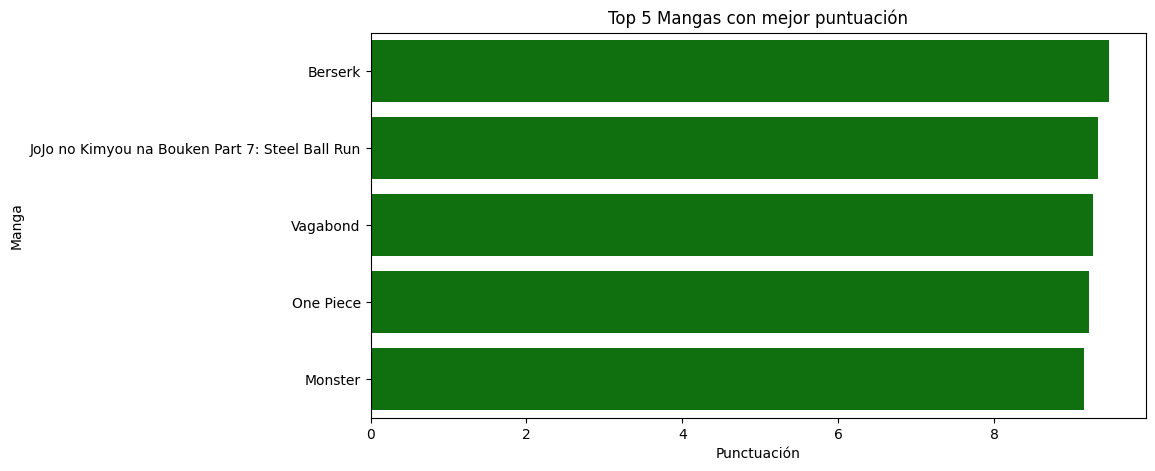

In [104]:
Top_5=Df_Data.head(5)
                   

plt.figure(figsize=(10,5))
sns.barplot(data=Top_5, x="Punctuation", y="Title", color="Green")
plt.title("Top 5 Mangas con mejor puntuación")
plt.xlabel("Punctuación")
plt.ylabel("Manga")
plt.show()

Text(0, 0.5, 'Cantidad de mangas')

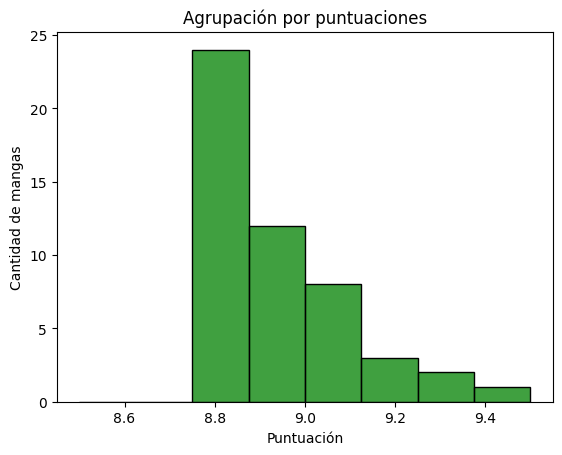

In [114]:
Bins= np.linspace(8.5,9.5,9)

sns.histplot(data=Df_Data, x= "Punctuation", bins=Bins, color="Green")
plt.title("Agrupación por puntuaciones")
plt.xlabel("Puntuación")
plt.ylabel("Cantidad de mangas")
